# Setup

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

experiments_folder = "../../../reports/model_selection/hyperparameter_tuning/"

results = pd.read_csv(experiments_folder+"random_grid_search25_08_23__14_57.csv",index_col=0).round(3)

In [32]:
results.sort_values(by="mean_auc",ascending=False)

,learning_rate,weight_decay,mean_auc,std,mean_val_CE,val_CE_std,mean_train_CE,train_CE_std
3,0.010,0.001,0.899,0.002,0.430,0.007,0.290,0.002
0,0.001,0.001,0.897,0.003,0.432,0.010,0.293,0.004
6,0.100,0.001,0.897,0.003,0.431,0.008,0.291,0.001
1,0.001,0.010,0.888,0.003,0.431,0.005,0.334,0.003
7,0.100,0.010,0.887,0.003,0.432,0.009,0.334,0.003
4,0.010,0.010,0.886,0.002,0.435,0.009,0.333,0.004
2,0.001,0.100,0.833,0.005,0.503,0.005,0.470,0.008
5,0.010,0.100,0.831,0.007,0.506,0.007,0.474,0.008
8,0.100,0.100,0.831,0.011,0.505,0.013,0.471,0.007


In [33]:
results.sort_values(by="mean_val_CE")

,learning_rate,weight_decay,mean_auc,std,mean_val_CE,val_CE_std,mean_train_CE,train_CE_std
3,0.010,0.001,0.899,0.002,0.430,0.007,0.290,0.002
1,0.001,0.010,0.888,0.003,0.431,0.005,0.334,0.003
6,0.100,0.001,0.897,0.003,0.431,0.008,0.291,0.001
0,0.001,0.001,0.897,0.003,0.432,0.010,0.293,0.004
7,0.100,0.010,0.887,0.003,0.432,0.009,0.334,0.003
4,0.010,0.010,0.886,0.002,0.435,0.009,0.333,0.004
2,0.001,0.100,0.833,0.005,0.503,0.005,0.470,0.008
8,0.100,0.100,0.831,0.011,0.505,0.013,0.471,0.007
5,0.010,0.100,0.831,0.007,0.506,0.007,0.474,0.008


In [34]:
auc_grid = results.pivot_table(values="mean_auc",index = "learning_rate", columns= "weight_decay")
val_CE_grid = results.pivot_table(values="mean_val_CE",index = "learning_rate", columns= "weight_decay")
train_CE_grid = results.pivot_table(values="mean_train_CE",index = "learning_rate", columns= "weight_decay")
columns = auc_grid.columns.values
index = auc_grid.index.values

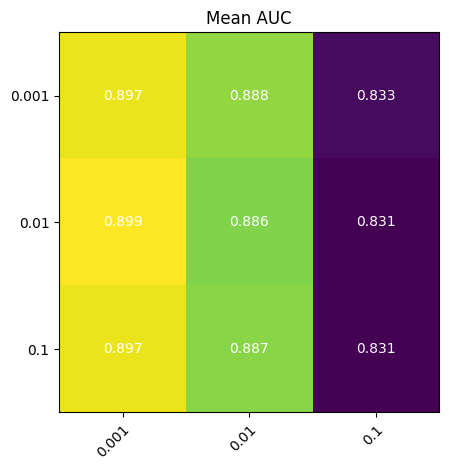

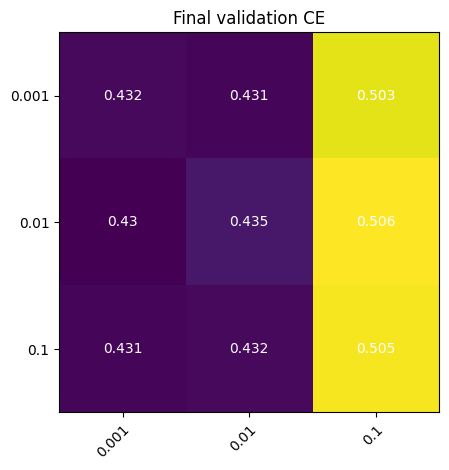

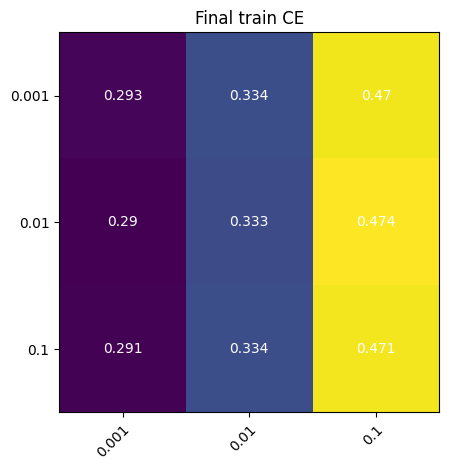

In [35]:
def plot_grid_search(df,index,columns,title):
    grid = df.values
    fig, ax = plt.subplots()
    im = ax.imshow(grid)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(columns)), labels=columns)
    ax.set_yticks(np.arange(len(index)), labels=index)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(index)):
        for j in range(len(columns)):
            text = ax.text(j, i, grid[i, j],
                        ha="center", va="center", color="w")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

plot_grid_search(auc_grid,index,columns,"Mean AUC")
plot_grid_search(val_CE_grid,index,columns,"Final validation CE")
plot_grid_search(train_CE_grid,index,columns,"Final train CE")